
# ASSIGNED Vibrations of CO2



Molecules can be modeled as masses connected by springs. With these models, we can estimate how the atoms move and vibrate.

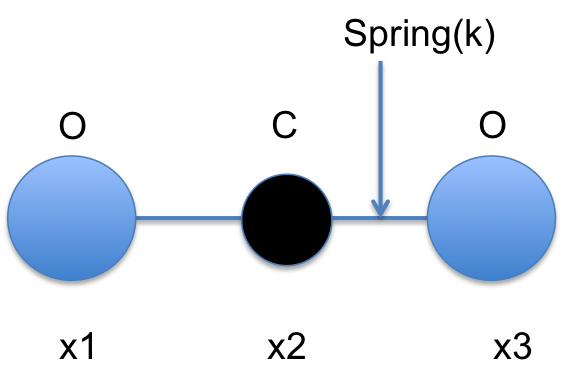

The equations of motion are defined as:

$M_O \frac{d^2x1}{dt^2} = k  (x2 - x1)$

$M_C \frac{d^2x2}{dt^2} = -k (x2 - x1) + k (x3 - x2)$

$M_O \frac{d^2x3}{dt^2} = -k (x3 - x2)$

Where $M_O=16$, $M_C=12$, and $k=48$. The $x_i$ variables represent a 1D deviation along the x-axis from the equilibrium positions of the atoms where the force is equal to zero.




## Convert this to a system of first-order differential equations



You can convert this to a system of FODEs by defining a new set of variables, e.g. $x4 = \frac{dx1}{dt}$, which can be interpreted as the velocity of the atom. Use this to derive a set of coupled first order differential equations. Write your equations here:




## Find the solution to this set of ODES



Assuming that at $t=0$, $x1 = -0.1, x2=0.0, x3=0.1$, and that the initial velocities of the atoms are 0, find a solution with solve\_ivp to your equations using solve\_ivp up to $t=10$.

-   Plot the positions (x1, x2, x3) for each atom as a function of time. Explain why they look the way they do for each atom.



-   Pick another set of initial conditions, make a plot, and explain why the solution looks the way it does.  Comment on any difference or lack of difference.




## ASSIGNED solution



To convert this to a system of first order ODEs, we define:

$x4 = x1'$

$x5 = x2'$

$x6 = x3'$

then

$x4' = k / mO * (x2 - x1)$

$x5' = 1 / mC * (-k * (x2 - x1) + k * (x3 - x2))$

$x6' = -k / mO * (x3 - x2)$

We solve the system like this.



In [1]:
mO = 16
mC = 12

k = 48

def yp(t, X):
    x1, x2, x3, x4, x5, x6 = X
    dx1dt = x4
    dx2dt = x5
    dx3dt = x6
    dx4dt = k / mO * (x2 - x1)
    dx5dt = 1 / mC * (-k * (x2 - x1) + k * (x3 - x2))
    dx6dt = -k / mO * (x3 - x2)
    return np.array([dx1dt,
                     dx2dt,
                     dx3dt,
                     dx4dt,
                     dx5dt,
                     dx6dt])

from scipy.integrate import solve_ivp

Y0 = np.array([-0.1, 0.0, 0.1, 0, 0, 0])

tspan = (0, 30)
teval = np.linspace(*tspan, 100)

sol = solve_ivp(yp, tspan, Y0, t_eval=teval)

To plot just the positions, we just plot the first three columns of the transposed solution.



(-0.11, 0.2)

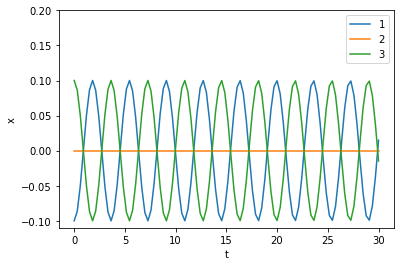

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(sol.t, sol.y[0:3].T)
plt.legend(['1', '2', '3'])
plt.xlabel('t')
plt.ylabel('x')
plt.ylim([-0.11, 0.2])

You can see from this that atoms 1 and 3 oscillate around their equilibrium position, while atom 2 appears to be stationary. That happens because atoms 1 and 3 move symmetrically towards and away from atom 0. In the ODE for dx5dt, you can see that the right hand side simplifies to

(-k \* (x2 - x1) + k \* (x3 - x2)) = k \* (x3 + x1)

and since x3 = -x1, it appears for this case the derivative will always be zero, and so x2 will be constant.

If you pick any non-symmetric initial conditions, then all three atoms will oscillate around.



(-0.11, 0.2)

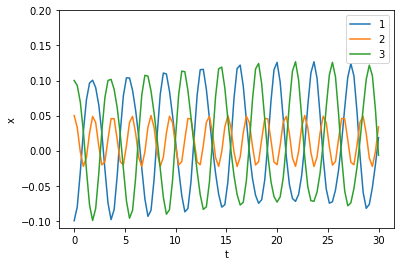

In [1]:
Y0 = np.array([-0.1, 0.05, 0.1, 0, 0, 0])

tspan = (0, 30)
teval = np.linspace(*tspan, 100)

sol = solve_ivp(yp, tspan, Y0, t_eval=teval)

plt.plot(sol.t, sol.y[0:3].T)
plt.legend(['1', '2', '3'])
plt.xlabel('t')
plt.ylabel('x')
plt.ylim([-0.11, 0.2])